# Scape Data From Reddit

In [4]:
import praw, requests
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe' #<-Change this for your system
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (16, 9)

subreddit = 'dankmemes'    
# Connect to reddit and download the subreddit front page
_secret     = 'agAYm70wPBewuKbnCAnAWLiH0Zk'# You will need to get your own credentials to put here
_clientId   = 'GqTsEKnK6fI-rw'# and here, see link above.
_user_agent = 'windows:FindYourMeme:0.1'
r = praw.Reddit(client_id=_clientId, client_secret=_secret, user_agent=_user_agent)
submissions = r.subreddit(subreddit).hot(limit=25)
image_extensions = ('.jpg', '.png', '.gif')


This bit takes a little while (about 2 minutes for 100 memes, so like 20 for 1000):

In [5]:
import sys
from ipywidgets import IntProgress
from IPython.display import display
from datetime import datetime
import json
import os

memeLimit = 1000
memeInfo = {}
subs = r.subreddit(subreddit).new(limit=memeLimit)
# setup progress bar
f = IntProgress(min=0, max=memeLimit)
display(f)

start = datetime.now()
for sub in subs:
    
    if sub.id in memeInfo:
        continue
    
    memeInfo[sub.id] = {
        "title": sub.title,
        "url"  : sub.url,
        "plink": sub.permalink,
        "time" : sub.created_utc
    }
    if sub.url.endswith(image_extensions):
        im = Image.open(requests.get(sub.url, stream=True).raw)
        memeInfo[sub.id]["imText"] = pytesseract.image_to_string(im).replace('\n', ' ')
        
    f.value += 1
    
taken = (datetime.now() - start)
print("Processed {} memes in {}".format(f.value, taken))

if os.path.isfile('memes.dat'):
    with open('memes.dat', 'r') as f:
        prevJson = f.read()
else:
    prevJson = "{}"
    
prevData = json.loads(prevJson)
prevData.update(memeInfo)
data = json.dumps(prevData)
with open("memes.dat", 'w') as f:
    f.write(data)

IntProgress(value=0, max=1000)

Processed 967 memes in 0:19:31.271331


# View Some images

https://i.imgur.com/th7A2XW.jpg



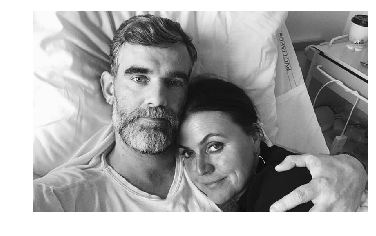

https://i.redd.it/qsz4vq3lucc21.jpg
Its over, Shaggy. My Stand |We Are Number One|]         g:        ll                     sea he Shae s volt  we ates  closer  Come and we  =) > 9 & S g SY) WA  We.     ACC |


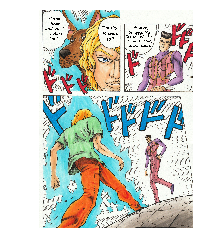

https://i.redd.it/u5euamoc1dc21.jpg
lM NOT STRAIGHT Amy Ordman - 242K views  ae  OK MAYBE | AM STRAIGHT Amy Ordman - 90K views 2 weeks ago


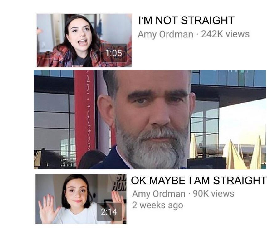

https://i.redd.it/bwjfshyxjdc21.jpg



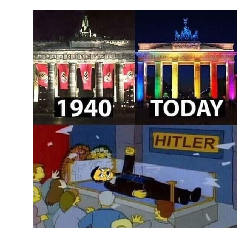

https://i.redd.it/76hqdzef6dc21.jpg
When you finally learn how to keep your eyes open in the pool  war


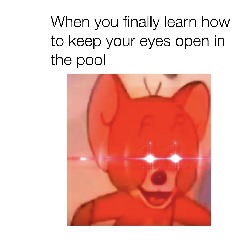

https://i.redd.it/fhwusw2vmdc21.jpg
pwd tu upbialtd


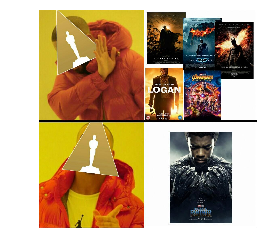

https://i.redd.it/6ye34rod0dc21.png
when you hear minecraft memes are coming back


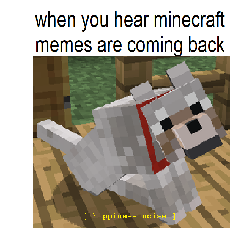

https://i.redd.it/k0udu5d8gdc21.jpg
Imagine your earbuds not being able to say the N-Word  ‘\ o  This post was made by the     Samsung IconX gang


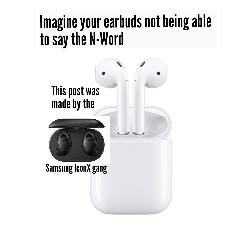

https://i.redd.it/57g7y78fucc21.jpg



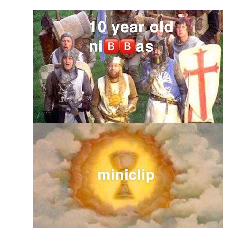

https://i.redd.it/n0vy5ku19dc21.jpg
| fear no man.  é  But that thing. ee ey


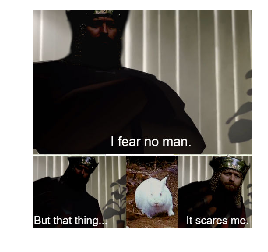

https://i.redd.it/bd1u499rocc21.jpg
Reddit Watermark Remover     ST AU eee RCE Mae ORC Mra CUE LLy      vy  CRICiUIMAcK Ec MAcie) 4


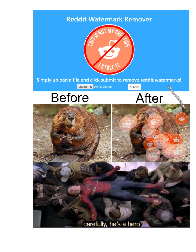

https://i.redd.it/ywt5hovbscc21.jpg
When someone mentions Stefan Karl in their post  Everyone:


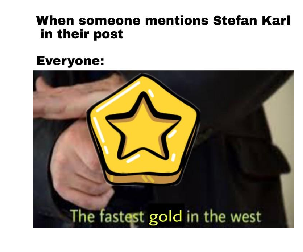

https://i.redd.it/ju2f6ydeycc21.jpg
Mods: You have been banned from participating in r/dankmemes.  40] ee ent Sa Ne Ue


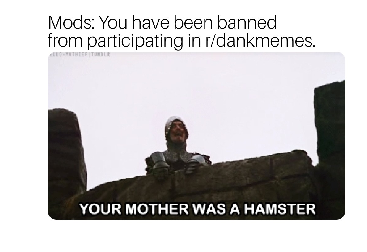

https://i.redd.it/qtvm2sun6dc21.jpg



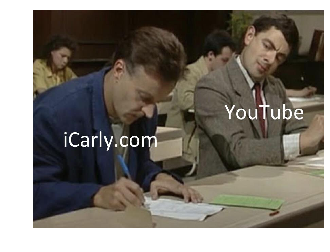

https://i.imgur.com/UROUXc1.png
Best Fortnite Tik Tok Compilation #12  Seen eee aceon  Oa seo en are ee a Beer nces      P }  what the fuck did you  eran et ae


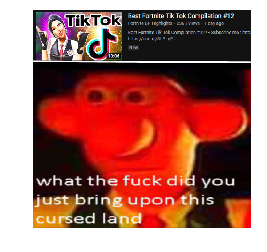

https://i.redd.it/xfx5hd1drbc21.jpg



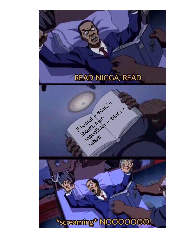

https://i.redd.it/7p2vmuk4ecc21.jpg
Someone: *makes communism memes*  We:


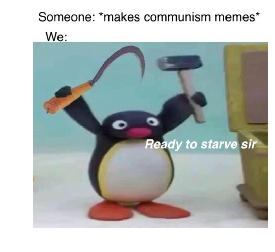

https://i.redd.it/iwam89rlcec21.jpg
When a relative visits you and gives you money without telling your parents


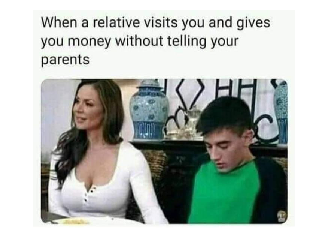

https://i.redd.it/7buk46pl8cc21.jpg
Eye: xhas eyelashes to prevent stuff from getting in eyex  Eyelash: «gets in eyex Eye:


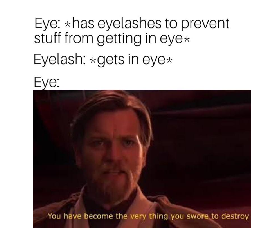

https://i.redd.it/tq9cnsl5qcc21.jpg



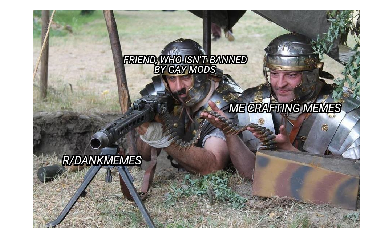

https://i.redd.it/bpho2om35dc21.png
Sort bynew  Sort by hot


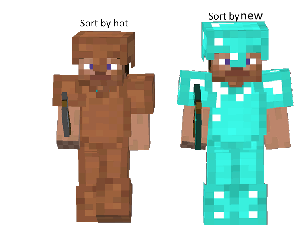

https://i.redd.it/65t2c2m73dc21.jpg
Orange arrows


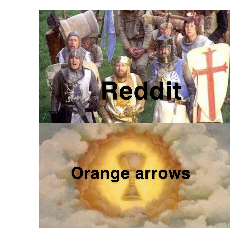

https://i.redd.it/q1z3qiar5dc21.jpg



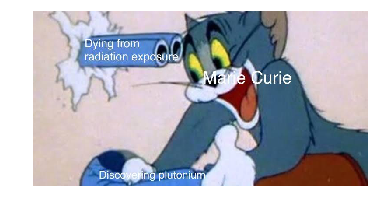

https://i.redd.it/yeyupjfmhcc21.jpg
When you're not sure what meme to use so you just use           ~s I  2 a eam. eyed [=           : | RR i: ao ee a , But ouitstanding!move         ik "  “AR 4 and that's a fact


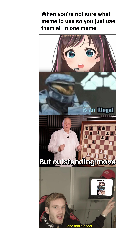

https://i.redd.it/5ou5i65vacc21.jpg
When everyone is spamming Monty Python memes on reddit        iN  o* Wait till Biggus Diék  \


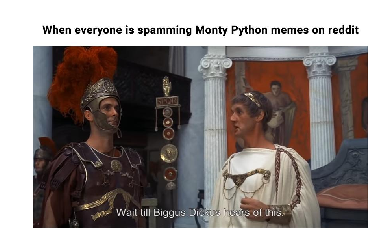

In [3]:
submissions = r.subreddit(subreddit).hot(limit=25)
for sub in submissions:
    if sub.url.endswith(image_extensions):
        print(sub.url)
        im = Image.open(requests.get(sub.url, stream=True).raw)
        print(pytesseract.image_to_string(im).replace('\n', ' '))
        plt.figure()
        plt.imshow(im)
        plt.axis('off')
        plt.show()

# Load data back in

In [1]:
import json
with open('memes.dat', 'r') as f:
    memeJSON = f.read()
memeData = json.loads(memeJSON)

print(len(memeData))
print(next(iter(memeData.values())))

964
{'title': 'Praise the sun lads', 'url': 'https://i.redd.it/5khojnroeec21.jpg', 'plink': '/r/dankmemes/comments/aje5ly/praise_the_sun_lads/', 'time': 1548347550.0, 'imText': 'Me raising the brightness of my memes so that people who browse reddit in the day can actually see them'}
